In [134]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from enum import Enum

In [135]:
class Colors(Enum):
    blue = '#0A85FF'
    darkblue = '#00264D'
    green = '#99CC00'
    darkgreen = '#739900'

In [136]:
battleground_path = './battleground-state-changes.csv'
df = pd.read_csv(battleground_path)

In [137]:
# Restructure data frame for easier access to Biden and Trump votes

def get_candidate_votes(row):
    if row['leading_candidate_name'] == 'Biden':
        row['biden_votes'] = row['leading_candidate_votes']
        row['trump_votes'] = row['trailing_candidate_votes']
    elif row['leading_candidate_name'] == 'Trump':
        row['biden_votes'] = row['trailing_candidate_votes']
        row['trump_votes'] = row['leading_candidate_votes']
    return row

df = df.apply(get_candidate_votes, axis=1)

In [138]:
a = np.array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

print(a[:,:-1])

[[0 1]
 [3 4]
 [6 7]]


In [139]:
class LinearRegression():
  def __init__(self, w, b):
    self.w = w
    self.b = b
    self.temp = 0

  def fit(self,X,y):
    one_col = np.ones([X.shape[0], 1])
    X = np.hstack([X, one_col])
    U, S, V = np.linalg.svd(X, full_matrices=False)
    idx = np.where(S > 1e-10)
    S_ = np.zeros(S.shape)
    S_[idx] = 1 / S[idx]
    S_ = np.diag(S_)
    X_ = (V. conj().T).dot(S_).dot(U.conj().T)
    self.temp = np.dot(X_, y)
    
#     wnorm = np.linalg.norm(temp)
#     we = temp / wnorm
#     points = np.linspace(0, 2, 100)
#     fig = plt.figure()
#     plt.scatter(X.dot(we), y)
#     plt.plot(points, points * wnorm)
#     plt.xlim(0, 0.04)
#     plt.ylim(0, 0.03)
#     print(temp)

    w = self.temp[0]
    b = self.temp[1]
    return LinearRegression(w, b)
  
  def predict(self, x):
    """ 
    Define the line here.
    Map x to it's y coordinates. The set {(x,y) | x from input, y from output} 
    should define your line.
    In this case x will be percentages reported like
    np.linspace(0.94, 1, 100).reshape([-1,1]) from 94% to 100%
    in Georgia
    """
    # To compute y values by w^T * x
    return np.dot(self.temp, x) 

<ipython-input-140-fc3a41226a14>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_py['percent_reporting'] = df_py['total_votes_count'] / int(7e+6)
<ipython-input-140-fc3a41226a14>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_py['trump_lead'] = (df_py['trump_votes'] - df_py['biden_votes']) / df_py['total_votes_count']
<ipython-input-140-fc3a41226a14>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

Text(0, 0.5, "Trump's percentage lead")

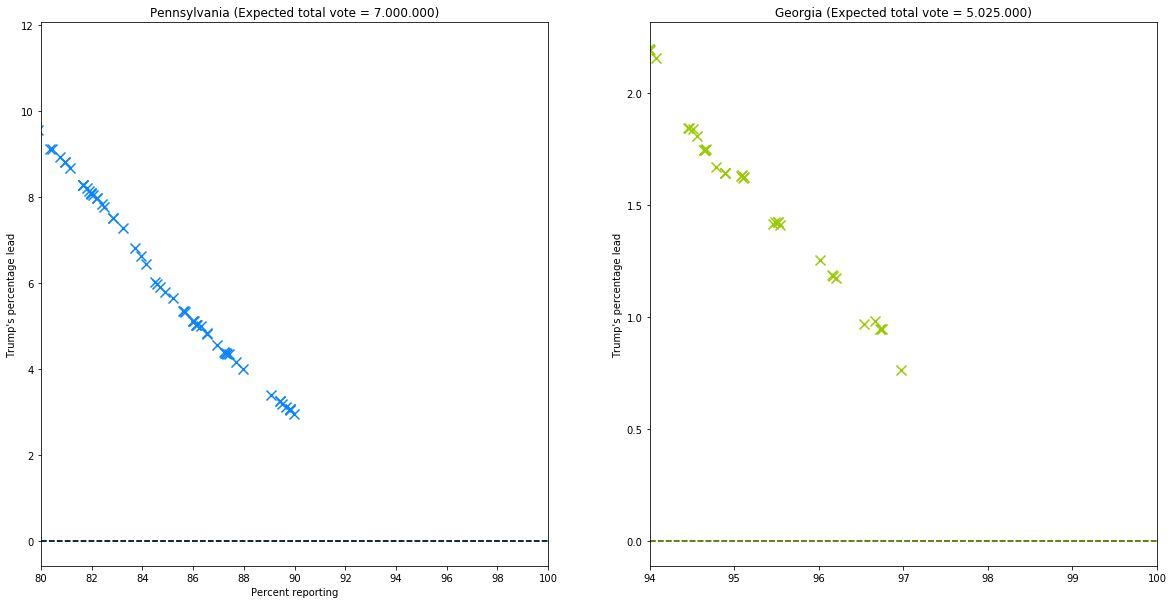

In [140]:
#Pennsylvania
df_py = df[df['state'] == 'Pennsylvania (EV: 20)']
df_py['percent_reporting'] = df_py['total_votes_count'] / int(7e+6)
df_py['trump_lead'] = (df_py['trump_votes'] - df_py['biden_votes']) / df_py['total_votes_count']
df_py = df_py.sort_values('percent_reporting', axis=0, ascending=False)

# Only view votes that were counted before 90% were reported
df_py = df_py[df_py['percent_reporting'] <= 0.9]

X = df_py['percent_reporting'].to_numpy().reshape([-1, 1])
y = df_py['trump_lead'].to_numpy()

# Fit X to y using Linear Regression
linear_py = LinearRegression(0,0).fit(X, y)

#################################################################################################################

#Georgia
df_ga = df[df['state'] == 'Georgia (EV: 16)']
df_ga['percent_reporting'] = df_ga['total_votes_count'] / int(5.025e+6)
df_ga['trump_lead'] = (df_ga['trump_votes'] - df_ga['biden_votes']) / df_ga['total_votes_count']
df_ga = df_ga.sort_values('percent_reporting', axis=0, ascending=False)

# Only view votes that were counted before 97% were reported
df_ga = df_ga[df_ga['percent_reporting'] <= 0.97]

X = df_ga['percent_reporting'].to_numpy().reshape([-1, 1])
y = df_ga['trump_lead'].to_numpy()

# Fit X to y using Linear Regression
linear_ga = LinearRegression(0,0).fit(X, y)

#################################################################################################################

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].scatter(df_py['percent_reporting'] * 100, df_py['trump_lead'] * 100, marker='x', s=100, color=Colors.blue.value)
x = np.linspace(0.8, 1, 100).reshape([-1,1])
y = linear_py.predict(x)
ax[0].set_xlim([85, 100])
ax[0].set_xticks(range(80, 101, 2))

ax[0].plot(x * 100, y * 100, linestyle='--', color=Colors.darkblue.value)

ax[0].hlines(y=0, xmin=80, xmax=100, linestyle='--', color='black')
ax[0].set_title('Pennsylvania (Expected total vote = 7.000.000)')

#################################################################################################################

ax[1].scatter(df_ga['percent_reporting'] * 100, df_ga['trump_lead'] * 100, marker='x', s=100, color=Colors.green.value)
x = np.linspace(0.94, 1, 100).reshape([-1,1])
y = linear_ga.predict(x)
ax[1].set_xlim([94, 100])
ax[1].set_xticks(range(94, 101, 1))
ax[1].plot(x * 100, y * 100, linestyle='--', color=Colors.darkgreen.value)
ax[1].hlines(y=0, xmin=94, xmax=100, linestyle='--', color='black')
ax[1].set_title('Georgia (Expected total vote = 5.025.000)')

ax[0].set_xlabel("Percent reporting")
ax[0].set_ylabel("Trump's percentage lead")
ax[1].set_ylabel("Trump's percentage lead")
# plt.savefig('trump_lead.svg', transparent=True)

At what percentage of reported votes will Biden lead over Trump?

In [141]:
# y = w * x + b = 0 --> to get x coordinate 
y = 0
w1 = linear_py.w
b1 = linear_py.b
print("In Pennsylvania: ", end='')
print(str(round((y - b1) / w1 * 100, 2)) + "%")

w2 = linear_ga.w
b2 = linear_ga.b
print("In Georgia: ", end='')
print(str(round((y - b2) / w2 * 100, 2)) + "%")

In Pennsylvania: 93.96%
In Georgia: 98.87%
